In [3]:
import pandas as pd
import numpy as np
import re
import math
import os
import warnings
warnings.filterwarnings('ignore')
import pickle
# from get_SA import get_modified_SA, get_SA, get_spectrum




In [28]:
os.getcwd()

'/home/workplace/ms2/MS2_embedding'

8878179
24


In [29]:
import matplotlib.pyplot as plt


all_mgf = []
with open("./data/SA/mgf.pkl", "rb") as f:
    all_mgf = pickle.load(f)
print(len(all_mgf[0][0]))
print(len(all_mgf))



8878179
24


In [4]:
def get_spectrum_by_anootation(mod):
    df = pd.read_csv("./result2/annotation_processed")
    df_with_mod =df.loc[df["mod_processed"] == mod, ["seq_stripped"]]
    sequence_list = []
    df_new = pd.DataFrame()
    print(df_with_mod.shape)
    for sequence in df_with_mod["seq_stripped"]:
        print(df_new.shape)
        df_sequence = df.loc[df["seq_stripped"] == sequence, :]
        df_new = pd.concat([df_new,df_sequence], axis=0)
    df_new.to_csv(f"mod2", sep="\t", index=False)


In [31]:
import plotly.express as px
import cufflinks

def compare_spectrum(spec1, spec2):
        
    spec1_mz = [i[0] for i in spec1]
    spec1_intensity = [i[1] for i in spec1]
    spec2_minus_intensity = [-i[1] for i in spec2]
    spec2_mz = [i[0] for i in spec2]
    # mz.append(400)
    # intensity.append(-2000)
    fig, ax = plt.subplots()
    ax.bar(spec1_mz, spec1_intensity)
    ax.bar(spec2_mz, spec2_minus_intensity)
    # plt.bar(mz, intensity)
    plt.xticks(rotation=90)
    plt.tight_layout()
    # Use absolute value for y-ticks
    ticks =  ax.get_yticks()
    ax.set_yticklabels([int(abs(tick)) for tick in ticks])

    plt.show()
    
def compare_spectrum1(spec1, spec2,x=100,x2=1000):
    spec1_mz = [i[0] for i in spec1]
    spec1_intensity = [i[1] for i in spec1]
    spec2_minus_intensity = [-i[1] for i in spec2]
    spec2_mz = [i[0] for i in spec2]
    # mz.append(400)
    # intensity.append(-2000)
    fig, ax = plt.subplots()
    ax.bar(spec1_mz, spec1_intensity)
    ax.bar(spec2_mz, spec2_minus_intensity)
    # plt.bar(mz, intensity)
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.axis([x,x2,-1, 1])
    # Use absolute value for y-ticks
    ticks =  ax.get_yticks()
    ax.set_yticklabels([int(abs(tick)) for tick in ticks])

    plt.show()

In [5]:
get_spectrum_by_anootation("Carbamidomethyl(M")
#file과 index 복사해서 compare spectrum


(33, 1)
(0, 0)
(57, 16)
(77, 16)
(78, 16)
(98, 16)
(117, 16)
(163, 16)
(211, 16)
(226, 16)
(258, 16)
(293, 16)
(294, 16)
(383, 16)
(410, 16)
(437, 16)
(488, 16)
(539, 16)
(606, 16)
(649, 16)
(730, 16)
(811, 16)
(849, 16)
(874, 16)
(899, 16)
(924, 16)
(1049, 16)
(1053, 16)
(1092, 16)
(1131, 16)
(1170, 16)
(1213, 16)
(1244, 16)
(1294, 16)


In [32]:
# del int
def get_spectrum(spec1_path, spec1_idx, mgf):
    spec1_path = spec1_path.split("\/")[-1]
    spec1_path = spec1_path.split("_")[4]
    path_int , path_letter = spec1_path[:2], spec1_path[2]
    
    if path_letter == 'B':
        path_int = int(path_int) + 11
    else:
        path_int = int(path_int) - 1
    
    spec1_mgf, index_begin, index_end = mgf[path_int]
    spec1_mgf = spec1_mgf[index_begin[spec1_idx-1]:index_end[spec1_idx-1]]
        
    spec1_list = []
    
    for a in spec1_mgf[5:]:
        spec1_list.append(list(map(float,a.split(" "))))
        
    return spec1_list

In [9]:
# df = pd.read_csv("mod1", delimiter="\t")
# print(f"SpectrumFile = {df.loc[1]['SpectrumFile']}, Index = {df.loc[1]['Index']}")
#-.MSGGWELELNGTEAK.L	1636.7403	Oxidation(M1)
spec1_file = "/z/data/chick_modp/mgf/3/b1928_293T_proteinID_08A_QE3_122212.mgf"
spec1_index = 34466
spec1_mass = 1620.7453
spec2_file = "/z/data/chick_modp/mgf/3/b1928_293T_proteinID_08A_QE3_122212.mgf"
spec2_index = 32731
spec2_mass = 1636.7403
spec1 = get_spectrum(spec1_file, spec1_index, all_mgf)
spec2 = get_spectrum(spec2_file, spec2_index, all_mgf)
#앞에있는것이 modified여야함.
delta_mass = spec1_mass-spec2_mass
print(f"delta mass  = {delta_mass}")

delta mass  = -15.99499999999989


In [33]:
# array = np.array(0)
# for mz, int in spec1:
#     pass
# print(array)
from sklearn.preprocessing import minmax_scale
spec1_mz = [i[0] for i  in spec1]
spec1_int = minmax_scale([i[1] for i  in spec1])
spec2_mz = [i[0] for i  in spec2]
spec2_int = minmax_scale([i[1] for i  in spec2])
# print(spec1)

spec1 = [(mz, intensity) for mz, intensity in zip(spec1_mz, spec1_int)]

spec2 = [(mz, intensity) for mz, intensity in zip(spec2_mz, spec2_int)]

In [11]:
spec1

[(110.071831, 0.27274551970753474),
 (110.078117, 0.011724092160976335),
 (111.075241, 0.006159870575227905),
 (120.08123, 0.006510835209142397),
 (129.06665, 0.0068741710069955865),
 (129.096878, 0.0),
 (129.102798, 0.14246490368671325),
 (130.065414, 0.023560215533332884),
 (130.086578, 0.07943758325517543),
 (132.080658, 0.002019281612115245),
 (134.566193, 0.0030141150429452788),
 (136.076126, 0.06921023152011214),
 (143.082031, 0.0044387373360885995),
 (143.118317, 0.017691912192390313),
 (146.063568, 0.10533675375860563),
 (147.112961, 0.1734987790519306),
 (147.120712, 0.0017008685307033835),
 (159.092041, 0.30321414506442806),
 (171.11293, 0.03436535250237445),
 (171.17984, 0.00337077464365086),
 (174.059128, 0.014719475670272694),
 (175.119522, 0.061131952105572665),
 (183.112823, 0.010556858854940912),
 (185.165421, 0.013017433493864809),
 (187.086853, 0.021961668630348197),
 (191.085159, 0.1251540990663587),
 (197.128174, 0.010949807883519704),
 (199.071121, 0.00661294142461

In [12]:
spec2

[(110.071632, 0.007813372566640648),
 (112.087463, 0.005263428190522402),
 (113.071327, 0.0009145603537402044),
 (115.087265, 0.0022451732543623693),
 (116.034782, 0.0003498471870749454),
 (116.071259, 0.011553561211520234),
 (120.0812, 0.11166295778684203),
 (121.084671, 0.008310318243334489),
 (126.055649, 0.0019286034624348327),
 (126.128357, 7.53507951635644e-05),
 (129.1026, 0.4856915803002423),
 (130.050323, 0.009431600445566606),
 (130.061035, 0.0015077169927159824),
 (130.098495, 0.0021747980537301314),
 (130.106247, 0.024167393471770337),
 (131.081619, 7.098670504156353e-05),
 (131.107681, 0.0004536414545490286),
 (131.118286, 0.0006618550587425711),
 (133.043442, 0.0013524376381515196),
 (133.060699, 0.00043480408129420044),
 (136.076202, 0.0015938254902880121),
 (139.050568, 0.0007551790907649837),
 (140.143448, 0.0001437456332994847),
 (141.102539, 0.003977125971318715),
 (141.462494, 0.00011065234054699971),
 (142.087173, 0.00017349051911435165),
 (142.123245, 0.0009671865

In [13]:
print(get_modified_SA(spec1, spec2, delta_mass))
print(get_SA(spec1, spec2))


0.029359291783512154
0.015570369318038901


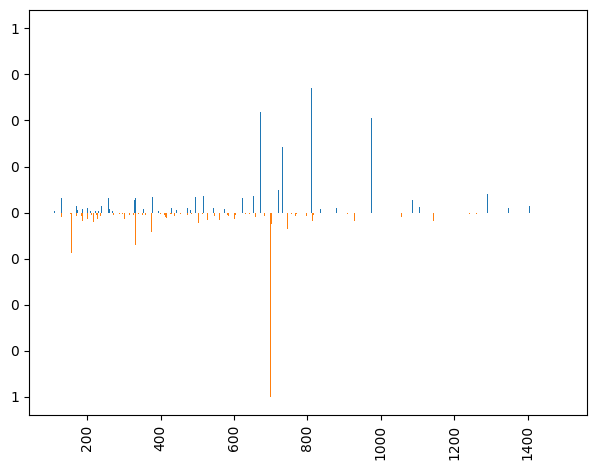

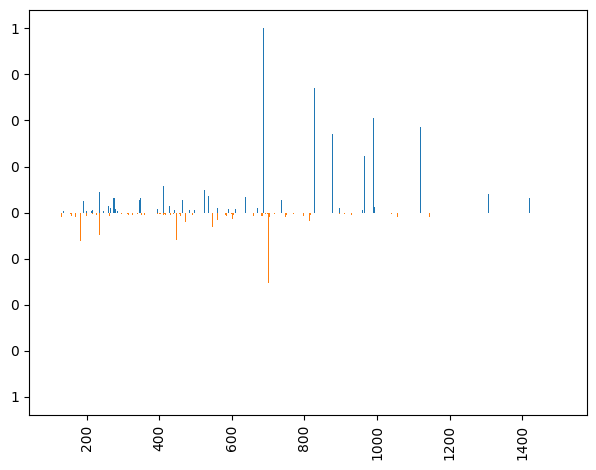

In [14]:
compare_spectrum(spec1,spec2)
spec3 = [(mz-delta_mass, intensity) for mz, intensity in spec1]
compare_spectrum(spec3,spec2)

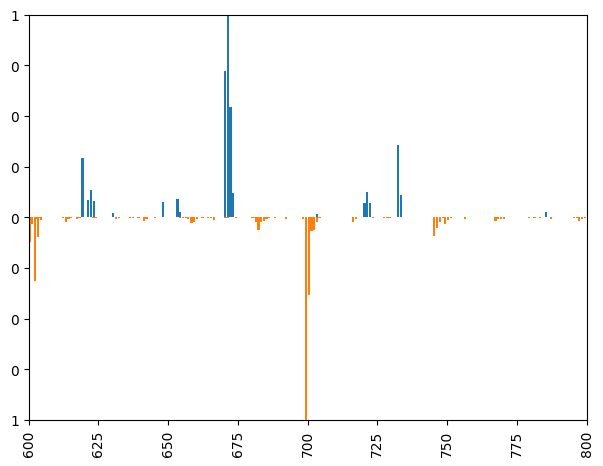

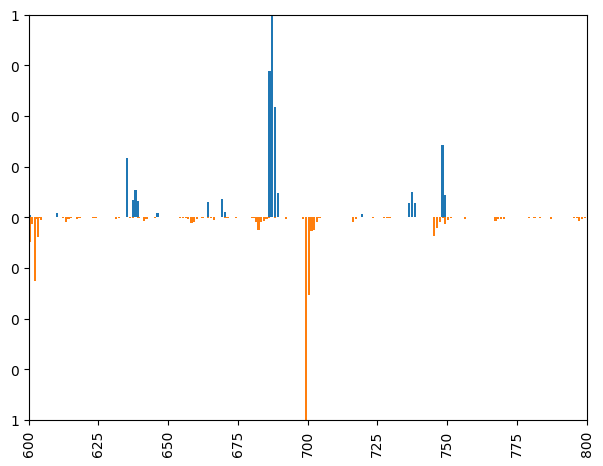

-15.99499999999989


In [15]:
compare_spectrum1(spec1,spec2,600,800)
spec3 = [(mz-delta_mass, intensity) for mz, intensity in spec1]
compare_spectrum1(spec3,spec2,600,800)
print(delta_mass)


In [48]:
df1 = pd.read_csv("../annotation_processed")
df2 = pd.read_csv("sorted.tsv", delimiter="\t")

In [51]:
df1 = pd.concat([df1,df2["Probability"]], axis=1)

In [52]:
df1

,mod,SA,SA_mod,SA_same_mod,SA_same_mod_with_mod,idx,rand,rand_SA,rand_idx,start_idx,SpectrumFile,Index,seq_stripped,CalculatedMW,ModificationAnnotation,mod_processed,Probability
0,0,0.636682,-1.0,-1.000000,-1.000000,7817,2,0.056507,174235,0,/z/data/chick_modp/mgf/1/b1906_293T_proteinID_...,22070,-.AAAEVAGQFVIK.L,1202.6659,-1,-1,1.0000
1,0,0.664001,-1.0,-1.000000,-1.000000,7883,2,0.062242,179451,0,/z/data/chick_modp/mgf/1/b1906_293T_proteinID_...,22267,-.AAAEVAGQFVIK.L,1202.6659,-1,-1,0.9902
2,0,0.299985,-1.0,-1.000000,-1.000000,7592,2,0.105968,337720,0,/z/data/chick_modp/mgf/1/b1906_293T_proteinID_...,21451,-.AAAEVAGQFVIK.L,1202.6659,-1,-1,0.3630
3,0,0.664001,-1.0,-1.000000,-1.000000,7902,2,0.012325,83931,0,/z/data/chick_modp/mgf/1/b1906_293T_proteinID_...,22316,-.AAAEVAGQFVIK.L,1202.6659,-1,-1,1.0000
4,1,NaN,NaN,0.768424,0.768424,234218,2,0.102525,70225,4,/z/data/chick_modp/mgf/1/b1939_293T_proteinID_...,14309,-.AAAMVPGR.S,813.4167,Acetyl/Nterm(A1),Acetyl/Nterm(A,0.9811
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
386295,0,NaN,-1.0,-1.000000,-1.000000,15884,2,0.035572,98741,386295,/z/data/chick_modp/mgf/3/b1922_293T_proteinID_...,3795,Y.YSHVDYR.D,938.4246,-1,-1,0.8967
386296,0,0.540305,-1.0,-1.000000,-1.000000,289356,2,0.088353,181668,386296,/z/data/chick_modp/mgf/2/b1942_293T_proteinID_...,30913,Y.YVTIIDAPGHR.D,1240.6564,-1,-1,0.9947
386297,0,0.597533,-1.0,-1.000000,-1.000000,106951,2,0.077052,293144,386296,/z/data/chick_modp/mgf/3/b1927_293T_proteinID_...,30955,Y.YVTIIDAPGHR.D,1240.6564,-1,-1,0.9921
386298,0,0.531769,-1.0,-1.000000,-1.000000,73618,2,0.139210,150229,386296,/z/data/chick_modp/mgf/2/b1925_293T_proteinID_...,27822,Y.YVTIIDAPGHR.D,1240.6564,-1,-1,0.9315


In [53]:
df1.to_csv("probability_annotaion", index=False)

In [55]:
df1 = df1.loc[df1["Probability"]>0.9]
df1.to_csv("probability_0.9", index=False)

In [56]:
df = pd.read_csv("probability_0.9")
df = df.dropna(axis=0)
df_grouped  = df.groupby("mod_processed").agg({"SA_mod" : "mean", "SA" : "mean", "mod" : "count"})
# df_grouped  = df.groupby("mod_processed")["SA_mod", "SA"].mean()
print(df_grouped)
df_grouped = df_grouped.loc[df_grouped["mod"] >9, :]
df_grouped.to_csv("grouped_by_mod.tsv", sep="\t", index=True)

                       SA_mod        SA     mod
mod_processed                                  
-1                  -1.000000  0.701668  217545
2-succinyl(C         0.423944  0.334956       2
4-ONE(K              0.656783  0.142448       1
AEBS(K               0.446381  0.268816      50
AEBS(S               0.638020  0.472077       5
...                       ...       ...     ...
cGMP+RMP-loss(S      0.389806  0.340223       1
glycidamide(K        0.299726  0.075371       3
glycidamide/Nterm(G  0.240544  0.224505       2
glycidamide/Nterm(S  0.133280  0.098815       1
methylol(K           0.849649  0.372348       2

[292 rows x 3 columns]


In [57]:
df_grouped

,SA_mod,SA,mod
mod_processed,,,
-1,-1.000000,0.701668,217545
AEBS(K,0.446381,0.268816,50
AEBS(Y,0.613400,0.333511,471
AEBS/Nterm(P,0.587744,0.299723,36
Acetyl/Nterm(A,0.449674,0.315151,104
...,...,...,...
Trp->Oxolactone(W,0.256459,0.222036,10
Unknown:302(D,0.591631,0.471256,15
Unknown:302(E,0.580488,0.545930,28


In [58]:
df_grouped["delta"] = df_grouped["SA_mod"] - df_grouped["SA"]
# df_grouped = df.sort_values(by=)
df_grouped

,SA_mod,SA,mod,delta
mod_processed,,,,
-1,-1.000000,0.701668,217545,-1.701668
AEBS(K,0.446381,0.268816,50,0.177565
AEBS(Y,0.613400,0.333511,471,0.279889
AEBS/Nterm(P,0.587744,0.299723,36,0.288022
Acetyl/Nterm(A,0.449674,0.315151,104,0.134523
...,...,...,...,...
Trp->Oxolactone(W,0.256459,0.222036,10,0.034424
Unknown:302(D,0.591631,0.471256,15,0.120375
Unknown:302(E,0.580488,0.545930,28,0.034558


In [59]:
df_sorted = df_grouped.sort_values(by="delta")

In [63]:
df_sorted.to_csv("grouped_and_sorted_by_delta.tsv", sep="\t")

In [23]:
df = pd.read_csv("result/probability_0.9")


In [24]:
df = df.dropna(axis=0)

In [25]:
print(df.shape)

(262596, 17)


In [26]:
df.to_csv("dropped_NA.csv", index=False)

In [22]:
df_grouped  = df.groupby(["seq_stripped","mod_processed"]).agg({"SA_mod" : "mean", "SA" : "mean", "mod" : "count"})
# df_grouped  = df.groupby("mod_processed")["SA_mod", "SA"].mean()
# print(df_grouped)
# df_grouped = df_grouped.loc[df_grouped["mod"] >9, :]
df_grouped.sort_index()
df_grouped.to_csv("seq_mod_grouped_By.tsv", sep="\t", index=True)

In [3]:
def mod():
        
    df = pd.read_csv("../SA_mean.txt")
    print(df.shape)
    # print(df.columns)
    # print(df.isna().sum())
    series = df["ModificationAnnotation"]
    print(series.isna().sum())
    series = series.fillna(-1)
    print(series.shape)
    print(series.isna().sum())
    df = df.drop(["ModificationAnnotation"], axis = 1)
    print(df.columns)
    df = pd.concat([df, series], axis= 1)
    print(df.columns)
    print(df.shape)
    # exit()
    new_series = []
    for mod_annotation in df["ModificationAnnotation"]:
        if mod_annotation == -1:
            new_series.append(-1)
        else:
            annotation = re.sub("[0-9]+\)","", mod_annotation)
            new_series.append(annotation)
            # print(annotation)
            # break
                    # stripped_seq = re.sub("\{","", query_seq)
    print(len(new_series))
    annotated_mod = pd.Series(new_series, name="mod_processed")
    df = pd.concat([df,annotated_mod], axis=1)
    print(df.shape)
    print(df.columns)
    print(df["mod_processed"])
    df.to_csv("annotation_processed", index=False)
    
    # df = df.dropna(axis=0)
    # df_grouped  = df.groupby("mod_processed").agg({"SA_mod" : "mean", "SA" : "mean", "mod" : "count"})
    # # df_grouped  = df.groupby("mod_processed")["SA_mod", "SA"].mean()
    # print(df_grouped)
    # df_grouped = df_grouped.loc[df_grouped["mod"] >9, :]
    # df_grouped.to_csv("grouped_by_mod.tsv", sep="\t", index=True)

mod()

(324588, 15)
0
(324588,)
0
Index(['mod', 'SA', 'SA_mod', 'SA_same_mod', 'SA_same_mod_with_mod', 'idx',
       'rand', 'rand_SA', 'rand_idx', 'start_idx', 'SpectrumFile', 'Index',
       'seq_stripped', 'CalculatedMW'],
      dtype='object')
Index(['mod', 'SA', 'SA_mod', 'SA_same_mod', 'SA_same_mod_with_mod', 'idx',
       'rand', 'rand_SA', 'rand_idx', 'start_idx', 'SpectrumFile', 'Index',
       'seq_stripped', 'CalculatedMW', 'ModificationAnnotation'],
      dtype='object')
(324588, 15)
324588
(324588, 16)
Index(['mod', 'SA', 'SA_mod', 'SA_same_mod', 'SA_same_mod_with_mod', 'idx',
       'rand', 'rand_SA', 'rand_idx', 'start_idx', 'SpectrumFile', 'Index',
       'seq_stripped', 'CalculatedMW', 'ModificationAnnotation',
       'mod_processed'],
      dtype='object')
0                     -1
1                     -1
2                     -1
3         Acetyl/Nterm(A
4         Acetyl/Nterm(A
               ...      
324583                -1
324584                -1
324585                

In [33]:
df = pd.read_csv("modification_class")
print(df.shape)

(21440, 4)


In [34]:
df["delta"] = df["unmod-unmod"] - df["mod-unmod"]
print(df.shape)

(21440, 5)


df_grouped  = df.groupby(["seq_stripped","mod_processed"]).agg({"SA_mod" : "mean", "SA" : "mean", "mod" : "count"})


In [35]:
df_group = df.groupby(["Annotation"]).agg({"seq_stripped" : "count", "delta" : "mean"})
print(df_group.shape)



(469, 2)


In [42]:
df_group = pd.read_csv("df_group.csv", decimal=",")

In [45]:
# df_group = df_group.astype({"seq_stripped" : "float"})
# df_group["seq_stripped"] = pd.to_numeric(df_group["seq_stripped"])

# print(df_group.dtypes)
df_group = df_group.loc[df_group["seq_stripped"] > 9]
print(df_group.shape)
df_group.to_csv("df_group1.csv")

(122, 3)
